In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import precision_score, mean_absolute_percentage_error,recall_score, accuracy_score,f1_score, confusion_matrix, mean_squared_error,ConfusionMatrixDisplay, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
pd.set_option('display.max_columns', None)
import folium
import pgeocode

## Part 1 - Exploratory Data Analysis

In [ ]:
house_data_df = pd.read_csv('processed_data_transformed.csv')
house_data_df.head()

,Unnamed: 0,Index,ID,Price,Address,Years Sold,Bed,Bath,Floor Space,Year Built,Num of Rooms,Internet,Gas,Refrigerator,Washer,Dryer,Microwave,Views,Parking-Carport,Parking-Garage,Parking-Open,Property Type,Condition,latitude,longitude,Zip_Code
0,0,1.0,1.0,625000,"2701 Van Ness Ave #505, San Francisco, CA 94109",2023,0,1.0,0,1929.0,4,0.0,1.0,0.0,1.0,0.0,1.0,Has a View,0.0,0.0,0.0,Residential,Updated/Remodeled,37.778008,-122.431272,94109.0
1,1,2.0,2.0,575000,"1 Hawthorne St #4F, San Francisco, CA 94105",2023,1,1.0,489,2010.0,0,0.0,0.0,1.0,1.0,1.0,1.0,{},0.0,1.0,0.0,Residential,Existing,37.778008,-122.431272,94105.0
2,2,3.0,3.0,620000,"113 Cleo Rand Ln, San Francisco, CA 94124",2023,2,2.0,1150,1989.0,9,0.0,1.0,0.0,1.0,1.0,0.0,Has a View,0.0,0.0,0.0,Residential,Updated/Remodeled,37.778008,-122.431272,94124.0
3,3,4.0,4.0,535000,"201 Harrison St #425, San Francisco, CA 94105",2023,1,1.0,572,1991.0,9,0.0,0.0,1.0,1.0,1.0,1.0,No View,0.0,1.0,0.0,Residential,NaN,37.778008,-122.431272,94105.0
4,4,5.0,5.0,625000,"47 Kiska Rd, San Francisco, CA 94124",2023,2,2.0,1272,1996.0,5,0.0,1.0,0.0,1.0,1.0,1.0,Has a View,1.0,1.0,0.0,Residential,Original,37.730213,-122.378984,94124.0


In [ ]:
house_data_df.drop(['Unnamed: 0','Index','ID'], axis = 1, inplace=True)
house_data_df.head()

,Price,Address,Years Sold,Bed,Bath,Floor Space,Year Built,Num of Rooms,Internet,Gas,Refrigerator,Washer,Dryer,Microwave,Views,Parking-Carport,Parking-Garage,Parking-Open,Property Type,Condition,latitude,longitude,Zip_Code
0,625000,"2701 Van Ness Ave #505, San Francisco, CA 94109",2023,0,1.0,0,1929.0,4,0.0,1.0,0.0,1.0,0.0,1.0,Has a View,0.0,0.0,0.0,Residential,Updated/Remodeled,37.778008,-122.431272,94109.0
1,575000,"1 Hawthorne St #4F, San Francisco, CA 94105",2023,1,1.0,489,2010.0,0,0.0,0.0,1.0,1.0,1.0,1.0,{},0.0,1.0,0.0,Residential,Existing,37.778008,-122.431272,94105.0
2,620000,"113 Cleo Rand Ln, San Francisco, CA 94124",2023,2,2.0,1150,1989.0,9,0.0,1.0,0.0,1.0,1.0,0.0,Has a View,0.0,0.0,0.0,Residential,Updated/Remodeled,37.778008,-122.431272,94124.0
3,535000,"201 Harrison St #425, San Francisco, CA 94105",2023,1,1.0,572,1991.0,9,0.0,0.0,1.0,1.0,1.0,1.0,No View,0.0,1.0,0.0,Residential,NaN,37.778008,-122.431272,94105.0
4,625000,"47 Kiska Rd, San Francisco, CA 94124",2023,2,2.0,1272,1996.0,5,0.0,1.0,0.0,1.0,1.0,1.0,Has a View,1.0,1.0,0.0,Residential,Original,37.730213,-122.378984,94124.0


In [ ]:
house_data_df.describe()

,Price,Bed,Bath,Floor Space,Year Built,Num of Rooms,Internet,Gas,Refrigerator,Washer,Dryer,Microwave,Parking-Carport,Parking-Garage,Parking-Open,latitude,longitude,Zip_Code
count,4.784000e+03,4784.000000,4784.000000,4784.000000,4434.000000,4784.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4769.000000,4769.000000,4782.000000
mean,1.635166e+06,2.534908,2.040050,1758.497074,1947.777853,5.765677,0.048714,0.381769,0.389714,0.602760,0.459753,0.246498,0.018608,0.566590,0.162032,37.767221,-122.380873,94120.182769
std,1.451460e+06,1.675428,1.264796,1962.300873,38.548782,6.117163,0.215292,0.485871,0.487736,0.489378,0.498430,0.431017,0.135149,0.495598,0.368519,0.252820,1.542129,75.406497
min,0.000000e+00,0.000000,0.000000,0.000000,1865.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.446764,-122.517825,94005.000000
25%,9.542500e+05,2.000000,1.000000,1000.000000,1914.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.744210,-122.448366,94110.000000
50%,1.325000e+06,2.000000,2.000000,1391.500000,1940.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,37.776679,-122.431272,94115.000000
75%,1.850000e+06,3.000000,3.000000,2066.500000,1983.000000,8.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,37.778008,-122.431272,94123.000000
max,1.915500e+07,16.000000,13.000000,65554.000000,2023.000000,219.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.745120,-80.076940,94965.000000


<AxesSubplot:>

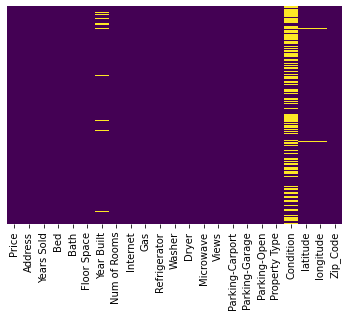

In [ ]:
# Check for Missing Data
sns.heatmap(house_data_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# Check for the zero values of price
sum(house_data_df['Price'] == 0)

58

In [ ]:
# Check for the zero values of floor space
sum(house_data_df['Floor Space'] == 0)

344

In [ ]:
# Check for the class names of categorical data
house_data_df['Condition'].unique()

array(['Updated/Remodeled', 'Existing', nan, 'Original',
       'New Construction', 'Original, Updated/Remodeled',
       'New Construction, Under Construction', 'Fixer',
       'New Construction, Updated/Remodeled',
       'Existing, New Construction', 'Fixer, Original',
       'Under Construction', 'Original, Fixer',
       'Fixer, Updated/Remodeled', 'Updated/Remodeled, New Construction',
       'Fixer, Under Construction', 'Fixer, Original, Updated/Remodeled',
       'Updated/Remodeled, Original',
       'Under Construction, Updated/Remodeled',
       'New Construct-To Be Built'], dtype=object)

In [ ]:
house_data_df['Property Type'].unique()

array(['Residential', 'Single Family Home', 'Condo', 'Apartment',
       'Multi Family', 'Unknown', 'Residential Income', 'Coop',
       'Lot Land', 'Townhouse', nan], dtype=object)

<AxesSubplot:xlabel='Bed', ylabel='Property Type'>

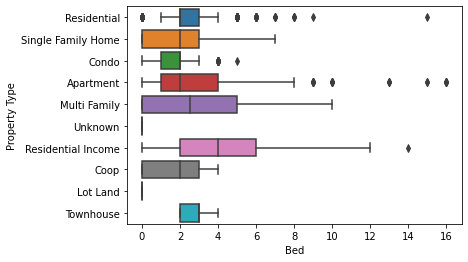

In [ ]:
sns.boxplot(data=house_data_df, x='Bed', y='Property Type')

<AxesSubplot:xlabel='Price', ylabel='Property Type'>

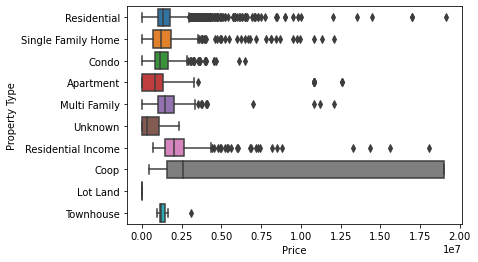

In [ ]:
sns.boxplot(data=house_data_df, x='Price', y='Property Type')

<AxesSubplot:xlabel='Price', ylabel='Zip_Code'>

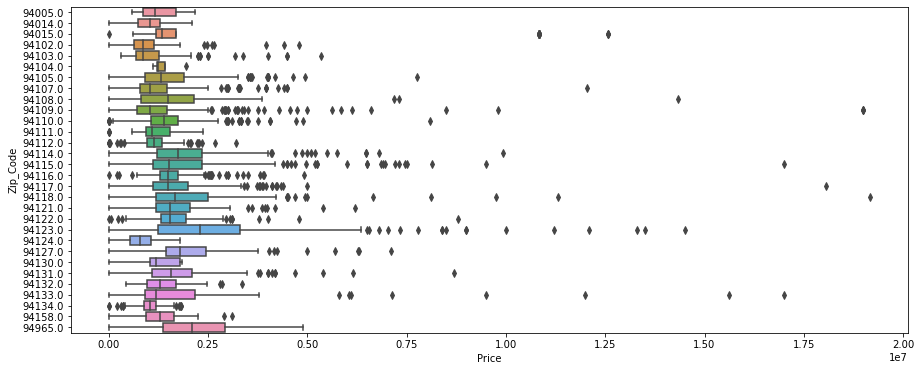

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=house_data_df, y='Zip_Code', x='Price', orient="h", ax = ax)

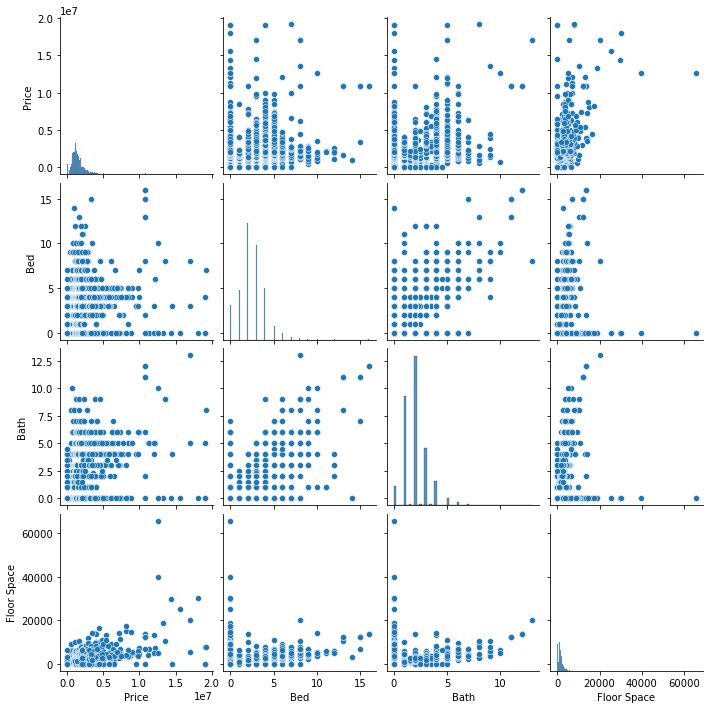

In [ ]:
sns.pairplot(data=house_data_df[['Price', 'Bed', 'Bath', 'Floor Space']])

<AxesSubplot:>

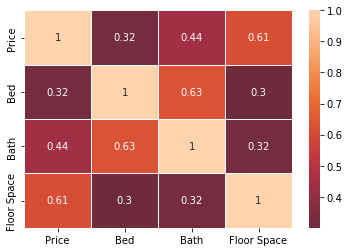

In [ ]:
sns.heatmap(data=house_data_df[['Price', 'Bed', 'Bath', 'Floor Space']].corr(), linewidths=0.5, center=0, annot=True)

## Part 2 - Data Processing

In [ ]:
# Drop the duplicates based on the address
house_data_df.drop_duplicates(subset = ['Address'], inplace = True)
house_data_df.shape

(4485, 23)

In [ ]:
# Remove the zero values om bathroom, price and floor space
house_data_df.drop(house_data_df[house_data_df.Price  == 0].index, inplace = True)
house_data_df.drop(house_data_df[house_data_df.Bath  == 0].index, inplace = True)
house_data_df.drop(house_data_df[house_data_df['Floor Space']  == 0].index, inplace = True)
house_data_df.shape

(3971, 23)

In [ ]:
house_data_df.describe()

,Price,Bed,Bath,Floor Space,Year Built,Num of Rooms,Internet,Gas,Refrigerator,Washer,Dryer,Microwave,Parking-Carport,Parking-Garage,Parking-Open,latitude,longitude,Zip_Code
count,3.971000e+03,3971.000000,3971.000000,3971.000000,3764.000000,3971.000000,3971.000000,3971.00000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3959.000000,3959.000000,3971.000000
mean,1.632036e+06,2.623269,2.182851,1758.693780,1949.194208,5.659028,0.051624,0.39864,0.406950,0.627298,0.477462,0.262151,0.019391,0.584236,0.170486,37.766271,-122.380103,94120.701838
std,1.327254e+06,1.644655,1.236266,1239.638026,38.601286,4.283067,0.221295,0.48968,0.491327,0.483585,0.499555,0.439860,0.137911,0.492915,0.376107,0.260467,1.553047,78.950195
min,2.200000e+03,0.000000,1.000000,1.000000,1865.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.446764,-122.517825,94005.000000
25%,9.681000e+05,2.000000,1.000000,1072.000000,1915.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.742967,-122.450621,94110.000000
50%,1.350000e+06,2.000000,2.000000,1440.000000,1941.000000,5.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,37.775171,-122.431272,94115.000000
75%,1.850000e+06,3.000000,3.000000,2070.000000,1986.000000,8.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,37.778008,-122.431272,94123.000000
max,1.915500e+07,16.000000,13.000000,20000.000000,2023.000000,52.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.745120,-80.076940,94965.000000


In [ ]:
# Calculate the age of the property
house_data_df.drop(house_data_df[house_data_df['Years Sold']  == 'None'].index, inplace = True)
year_sold = [float(d) for d in house_data_df['Years Sold']]
house_data_df['Prop_Age'] = year_sold - house_data_df['Year Built']
house_data_df.head()

,Price,Address,Years Sold,Bed,Bath,Floor Space,Year Built,Num of Rooms,Internet,Gas,Refrigerator,Washer,Dryer,Microwave,Views,Parking-Carport,Parking-Garage,Parking-Open,Property Type,Condition,latitude,longitude,Zip_Code,Prop_Age
1,575000,"1 Hawthorne St #4F, San Francisco, CA 94105",2023,1,1.0,489,2010.0,0,0.0,0.0,1.0,1.0,1.0,1.0,{},0.0,1.0,0.0,Residential,Existing,37.778008,-122.431272,94105.0,13.0
2,620000,"113 Cleo Rand Ln, San Francisco, CA 94124",2023,2,2.0,1150,1989.0,9,0.0,1.0,0.0,1.0,1.0,0.0,Has a View,0.0,0.0,0.0,Residential,Updated/Remodeled,37.778008,-122.431272,94124.0,34.0
3,535000,"201 Harrison St #425, San Francisco, CA 94105",2023,1,1.0,572,1991.0,9,0.0,0.0,1.0,1.0,1.0,1.0,No View,0.0,1.0,0.0,Residential,NaN,37.778008,-122.431272,94105.0,32.0
4,625000,"47 Kiska Rd, San Francisco, CA 94124",2023,2,2.0,1272,1996.0,5,0.0,1.0,0.0,1.0,1.0,1.0,Has a View,1.0,1.0,0.0,Residential,Original,37.730213,-122.378984,94124.0,27.0
5,412287,"300 Beale St #316, San Francisco, CA 94105",2023,1,1.0,751,1937.0,9,0.0,0.0,1.0,1.0,1.0,0.0,No View,0.0,0.0,1.0,Residential,NaN,37.778008,-122.431272,94105.0,86.0


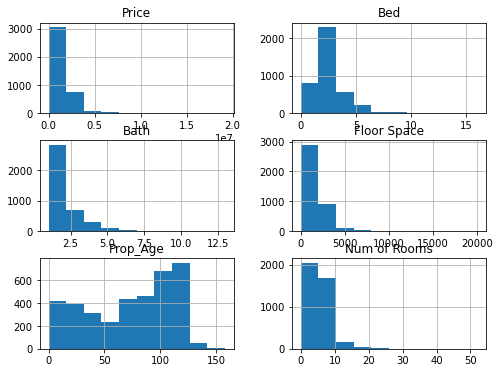

In [ ]:
# The distribution of numeric variables
house_data_df[['Price', 'Bed', 'Bath', 'Floor Space','Prop_Age','Num of Rooms']].hist(figsize = (8,6))
plt.show()

## Part 3 - Modeling

### Linear Regression Model 1 (Price as dependent variable)

In [ ]:
house_data_df1 = house_data_df
house_data_df1.drop(house_data_df1[house_data_df1.Price  < 300000].index, inplace = True)
house_data_df1.shape

(3908, 24)

In [ ]:
house_data_df_model1 = house_data_df1[['Price','Bed','Bath','Floor Space','Parking-Garage','Parking-Open','Zip_Code']]

In [ ]:
zip_dummies = pd.get_dummies(house_data_df_model1['Zip_Code'])
zip_dummies.head()

,94005.0,94014.0,94015.0,94102.0,94103.0,94104.0,94105.0,94107.0,94108.0,94109.0,94110.0,94111.0,94112.0,94114.0,94115.0,94116.0,94117.0,94118.0,94121.0,94122.0,94123.0,94124.0,94127.0,94130.0,94131.0,94132.0,94133.0,94134.0,94158.0,94965.0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_model1 = pd.concat([house_data_df_model1, zip_dummies], axis=1)      
df_model1.drop(['Zip_Code', 94965.0], inplace=True, axis=1)
df_model1.head()

,Price,Bed,Bath,Floor Space,Parking-Garage,Parking-Open,94005.0,94014.0,94015.0,94102.0,94103.0,94104.0,94105.0,94107.0,94108.0,94109.0,94110.0,94111.0,94112.0,94114.0,94115.0,94116.0,94117.0,94118.0,94121.0,94122.0,94123.0,94124.0,94127.0,94130.0,94131.0,94132.0,94133.0,94134.0,94158.0
1,575000,1,1.0,489,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,620000,2,2.0,1150,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,535000,1,1.0,572,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,625000,2,2.0,1272,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,412287,1,1.0,751,0.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Dropped 94965.0 zip code from columns, it'd be the base 

In [ ]:
df_model1.columns = df_model1.columns.astype(str)
features = df_model1.drop(['Price'], axis = 1, inplace = False)
features = sm.add_constant(features)
price = df_model1['Price']
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=42)

In [ ]:
model_lr1 = sm.OLS(y_train, X_train).fit()
print(model_lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     132.8
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:22:26   Log-Likelihood:                -47211.
No. Observations:                3126   AIC:                         9.449e+04
Df Residuals:                    3091   BIC:                         9.470e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.356e+05   1.78e+05      2.

In [ ]:
mean_absolute_percentage_error(y_test, model_lr1.predict(X_test))

0.38267548046724986

### Linear Regression Model 2 (Price as dependent variable, adding Num of Rooms, Condition, and Views to the independent variables)

In [ ]:
house_data_df2 = house_data_df
house_data_df2.drop(house_data_df2[house_data_df2.Price  < 10000].index, inplace = True) 
house_data_df2.head()

,Price,Address,Years Sold,Bed,Bath,Floor Space,Year Built,Num of Rooms,Internet,Gas,Refrigerator,Washer,Dryer,Microwave,Views,Parking-Carport,Parking-Garage,Parking-Open,Property Type,Condition,latitude,longitude,Zip_Code,Prop_Age
1,575000,"1 Hawthorne St #4F, San Francisco, CA 94105",2023,1,1.0,489,2010.0,0,0.0,0.0,1.0,1.0,1.0,1.0,{},0.0,1.0,0.0,Residential,Existing,37.778008,-122.431272,94105.0,13.0
2,620000,"113 Cleo Rand Ln, San Francisco, CA 94124",2023,2,2.0,1150,1989.0,9,0.0,1.0,0.0,1.0,1.0,0.0,Has a View,0.0,0.0,0.0,Residential,Updated/Remodeled,37.778008,-122.431272,94124.0,34.0
3,535000,"201 Harrison St #425, San Francisco, CA 94105",2023,1,1.0,572,1991.0,9,0.0,0.0,1.0,1.0,1.0,1.0,No View,0.0,1.0,0.0,Residential,NaN,37.778008,-122.431272,94105.0,32.0
4,625000,"47 Kiska Rd, San Francisco, CA 94124",2023,2,2.0,1272,1996.0,5,0.0,1.0,0.0,1.0,1.0,1.0,Has a View,1.0,1.0,0.0,Residential,Original,37.730213,-122.378984,94124.0,27.0
5,412287,"300 Beale St #316, San Francisco, CA 94105",2023,1,1.0,751,1937.0,9,0.0,0.0,1.0,1.0,1.0,0.0,No View,0.0,0.0,1.0,Residential,NaN,37.778008,-122.431272,94105.0,86.0


In [ ]:
# Manipulate the View
house_data_df2.loc[house_data_df2['Views'] == '{}', 'Views'] = 'No View'
house_data_df2.head()

,Price,Address,Years Sold,Bed,Bath,Floor Space,Year Built,Num of Rooms,Internet,Gas,Refrigerator,Washer,Dryer,Microwave,Views,Parking-Carport,Parking-Garage,Parking-Open,Property Type,Condition,latitude,longitude,Zip_Code,Prop_Age
1,575000,"1 Hawthorne St #4F, San Francisco, CA 94105",2023,1,1.0,489,2010.0,0,0.0,0.0,1.0,1.0,1.0,1.0,No View,0.0,1.0,0.0,Residential,Existing,37.778008,-122.431272,94105.0,13.0
2,620000,"113 Cleo Rand Ln, San Francisco, CA 94124",2023,2,2.0,1150,1989.0,9,0.0,1.0,0.0,1.0,1.0,0.0,Has a View,0.0,0.0,0.0,Residential,Updated/Remodeled,37.778008,-122.431272,94124.0,34.0
3,535000,"201 Harrison St #425, San Francisco, CA 94105",2023,1,1.0,572,1991.0,9,0.0,0.0,1.0,1.0,1.0,1.0,No View,0.0,1.0,0.0,Residential,NaN,37.778008,-122.431272,94105.0,32.0
4,625000,"47 Kiska Rd, San Francisco, CA 94124",2023,2,2.0,1272,1996.0,5,0.0,1.0,0.0,1.0,1.0,1.0,Has a View,1.0,1.0,0.0,Residential,Original,37.730213,-122.378984,94124.0,27.0
5,412287,"300 Beale St #316, San Francisco, CA 94105",2023,1,1.0,751,1937.0,9,0.0,0.0,1.0,1.0,1.0,0.0,No View,0.0,0.0,1.0,Residential,NaN,37.778008,-122.431272,94105.0,86.0


In [ ]:
# Manipulate the Parking condition
house_data_df2['Parking'] = np.where(house_data_df2['Parking-Carport'] + house_data_df2['Parking-Garage'] + house_data_df2['Parking-Open'] >0 ,1,0)
house_data_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3908 entries, 1 to 4782
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            3908 non-null   int64  
 1   Address          3908 non-null   object 
 2   Years Sold       3908 non-null   object 
 3   Bed              3908 non-null   int64  
 4   Bath             3908 non-null   float64
 5   Floor Space      3908 non-null   int64  
 6   Year Built       3708 non-null   float64
 7   Num of Rooms     3908 non-null   int64  
 8   Internet         3908 non-null   float64
 9   Gas              3908 non-null   float64
 10  Refrigerator     3908 non-null   float64
 11  Washer           3908 non-null   float64
 12  Dryer            3908 non-null   float64
 13  Microwave        3908 non-null   float64
 14  Views            3908 non-null   object 
 15  Parking-Carport  3908 non-null   float64
 16  Parking-Garage   3908 non-null   float64
 17  Parking-Open  

In [ ]:
house_data_df_model2 = house_data_df2[['Price','Floor Space', 'Num of Rooms', 'Bed','Bath', 'Prop_Age', 'Condition', 'Views', 'Zip_Code', 'Parking']]

In [ ]:
# Dummies for zip code
zip_dummies = pd.get_dummies(house_data_df_model2['Zip_Code'])
df_model2 = pd.concat([house_data_df_model2, zip_dummies], axis=1)      
df_model2.drop(['Zip_Code', 94965.0], inplace=True, axis=1)

#Dummies for condition 
condition_dummies = pd.get_dummies(house_data_df_model2['Condition'])
df_model2 = pd.concat([df_model2, condition_dummies], axis=1)      
df_model2.drop(['Condition', 'Existing'], inplace=True, axis=1)

# Dummines for Views
view_dummies = pd.get_dummies(house_data_df_model2['Views'])
df_model2 = pd.concat([df_model2, view_dummies], axis=1)      
df_model2.drop(['Views', 'No View'], inplace=True, axis=1)

In [ ]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3908 entries, 1 to 4782
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Price                                  3908 non-null   int64  
 1   Floor Space                            3908 non-null   int64  
 2   Num of Rooms                           3908 non-null   int64  
 3   Bed                                    3908 non-null   int64  
 4   Bath                                   3908 non-null   float64
 5   Prop_Age                               3708 non-null   float64
 6   Parking                                3908 non-null   int64  
 7   94005.0                                3908 non-null   uint8  
 8   94014.0                                3908 non-null   uint8  
 9   94015.0                                3908 non-null   uint8  
 10  94102.0                                3908 non-null   uint8  
 11  9410

In [ ]:
df_model2 = df_model2.dropna()

In [ ]:
df_model2.columns = df_model2.columns.astype(str)
features = df_model2.drop(['Price'], axis = 1, inplace = False)
features = sm.add_constant(features)
price = df_model2['Price']
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=123)

In [ ]:
model_lr2 = sm.OLS(y_train, X_train).fit()
print(model_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     71.97
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:23:01   Log-Likelihood:                -44822.
No. Observations:                2966   AIC:                         8.975e+04
Df Residuals:                    2914   BIC:                         9.006e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
mean_absolute_percentage_error(y_test, model_lr2.predict(X_test))

0.32690827061426847

### Linear Regression Model 3 (Price/sqft as dependent variable)

In [ ]:
house_data_df3 = house_data_df
# Calculate the price per sqft
house_data_df3['Price_per_sqft'] = house_data_df3.Price / house_data_df3['Floor Space']
house_data_df3.describe()

,Price,Bed,Bath,Floor Space,Year Built,Num of Rooms,Internet,Gas,Refrigerator,Washer,Dryer,Microwave,Parking-Carport,Parking-Garage,Parking-Open,latitude,longitude,Zip_Code,Prop_Age,Parking,Price_per_sqft
count,3.908000e+03,3908.000000,3908.000000,3908.000000,3708.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3897.000000,3897.000000,3908.000000,3708.000000,3908.000000,3.908000e+03
mean,1.650348e+06,2.634084,2.187590,1762.685517,1949.094930,5.681679,0.051945,0.401740,0.408137,0.627943,0.479529,0.262794,0.019703,0.589048,0.171699,37.766315,-122.379184,94120.866172,73.080367,0.620266,1.339960e+03
std,1.321058e+06,1.644401,1.237562,1242.944263,38.531006,4.289140,0.221944,0.490313,0.491552,0.483415,0.499645,0.440208,0.138996,0.492070,0.377167,0.262512,1.565335,79.520271,38.520578,0.485383,2.238232e+04
min,3.000000e+05,0.000000,1.000000,1.000000,1865.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.446764,-122.517825,94005.000000,0.000000,0.000000,5.637255e+01
25%,9.856000e+05,2.000000,1.000000,1075.000000,1915.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.742885,-122.450839,94110.000000,37.000000,0.000000,7.690685e+02
50%,1.350000e+06,2.000000,2.000000,1442.000000,1941.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,37.775128,-122.431272,94115.000000,82.000000,1.000000,9.626607e+02
75%,1.850000e+06,3.000000,3.000000,2070.000000,1985.000000,8.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,37.778008,-122.431272,94123.000000,107.000000,1.000000,1.152461e+03
max,1.915500e+07,16.000000,13.000000,20000.000000,2023.000000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.745120,-80.076940,94965.000000,158.000000,1.000000,1.400000e+06


In [ ]:
# Detect the outliers based on IQR
Q1 = np.percentile(house_data_df3['Price_per_sqft'], 25, interpolation = 'midpoint')
Q3 = np.percentile(house_data_df3['Price_per_sqft'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print(upper, " - ", lower)

1728.0236971454897  -  193.43585164277636


In [ ]:
# Remove the lower outliers
house_data_df3 = house_data_df3.drop(house_data_df3[house_data_df3['Price_per_sqft']  > 1728.0236971454897].index)
house_data_df3 = house_data_df3.drop(house_data_df3[house_data_df3['Price_per_sqft']  < 170.2150344115821].index)
house_data_df3.shape

(3783, 26)

In [ ]:
house_data_df_model3 = house_data_df3[['Price_per_sqft','Bed','Bath','Floor Space','Parking-Garage','Parking-Open','Property Type','Zip_Code','Prop_Age']]

In [ ]:
house_data_df_model3 = house_data_df_model3.dropna()
house_data_df_model3.shape

(3589, 9)

In [ ]:
type_dummies = pd.get_dummies(house_data_df_model3['Property Type'])
zip_dummies = pd.get_dummies(house_data_df_model3['Zip_Code'])
df_model3 = pd.concat([house_data_df_model3, type_dummies, zip_dummies], axis=1)  
df_model3.drop(['Property Type', 'Apartment'], inplace=True, axis=1)
df_model3.drop(['Zip_Code', 94965.0], inplace=True, axis=1)
df_model3.head()

,Price_per_sqft,Bed,Bath,Floor Space,Parking-Garage,Parking-Open,Prop_Age,Condo,Coop,Multi Family,Residential,Residential Income,Single Family Home,Townhouse,94005.0,94014.0,94015.0,94102.0,94103.0,94104.0,94105.0,94107.0,94108.0,94109.0,94110.0,94111.0,94112.0,94114.0,94115.0,94116.0,94117.0,94118.0,94121.0,94122.0,94123.0,94124.0,94127.0,94130.0,94131.0,94132.0,94133.0,94134.0,94158.0
1,1175.869121,1,1.0,489,1.0,0.0,13.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,539.130435,2,2.0,1150,0.0,0.0,34.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,935.314685,1,1.0,572,1.0,0.0,32.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,491.352201,2,2.0,1272,1.0,0.0,27.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,548.984021,1,1.0,751,0.0,1.0,86.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_model3.columns = df_model3.columns.astype(str)
features = df_model3.drop(['Price_per_sqft'], axis = 1, inplace = False)
features = sm.add_constant(features)
price = df_model3['Price_per_sqft']
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=42)

In [ ]:
model_lr3 = sm.OLS(y_train, X_train).fit()
print(model_lr3.summary())

                            OLS Regression Results                            
Dep. Variable:         Price_per_sqft   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     35.76
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          8.22e-227
Time:                        23:25:47   Log-Likelihood:                -19697.
No. Observations:                2871   AIC:                         3.948e+04
Df Residuals:                    2828   BIC:                         3.974e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                970.5001     64

In [ ]:
mean_absolute_percentage_error(y_test, model_lr3.predict(X_test))

0.2348187073906354

### RF Regressor (Price/sqft as dependent variable)

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
mean_absolute_percentage_error(y_test, model_rf.predict(X_test))

0.21038923325330555

### GBRegressor (Price/sqft as dependent variable)

In [ ]:
model_gbr = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
mean_absolute_percentage_error(y_test, model_gbr.predict(X_test))

0.22278076455270499

### Neural Networks (Price/sqft as dependent variable)

In [ ]:
modelnn = Sequential()
modelnn.add(Dense(20,activation='relu'))
modelnn.add(Dense(20,activation='relu'))
modelnn.add(Dense(20,activation='relu'))
modelnn.add(Dense(20,activation='relu'))
modelnn.add(Dense(1)) 
modelnn.compile(optimizer='adam',loss='mse')

In [ ]:
modelnn.fit(x=X_train,y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

In [ ]:
mean_absolute_percentage_error(y_test, modelnn.predict(X_test))

### Neural Networks - Design 2 (Price/sqft as dependent variable)

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
NN_model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

In [ ]:
mean_absolute_percentage_error(y_test, NN_model.predict(X_test))

## Part 4 - Result Visualization

In [ ]:
def get_coef_table(lin_reg):
    ''' lin_reg is a fitted statsmodels regression model
    Return a dataframe containing coefficients, pvalues, and the confidence intervals
    '''
    err_series = lin_reg.params - lin_reg.conf_int()[0]
    coef_df = pd.DataFrame({'coef': lin_reg.params.values[0:],
                            'ci_err': err_series.values[0:],
                            'pvalue': lin_reg.pvalues.round(4).values[0:],
                            'varname': err_series.index.values[0:]
                           })
    return coef_df

In [ ]:
get_coef_table(model_lr3)

,coef,ci_err,pvalue,varname
0,976.495194,156.062689,0.0000,const
1,-5.960271,10.680383,0.2739,Bed
2,26.387297,15.695879,0.0010,Bath
3,-0.037399,0.016515,0.0000,Floor Space
4,98.863456,30.419785,0.0000,Parking-Garage
5,8.095418,30.470861,0.6025,Parking-Open
6,0.449575,0.356884,0.0136,Prop_Age
7,235.134356,93.610014,0.0000,Condo
8,587.832993,312.231178,0.0002,Coop
9,-199.975153,103.397706,0.0002,Multi Family


In [ ]:
df_result = get_coef_table(model_lr3)
df_result['coef_diff'] =  df_result['coef'][0] + df_result['coef']
df_result = df_result[['varname','coef_diff']]
df_result = df_result[14:]
df_result['coef_diff'] = df_result['coef_diff'] - np.min(df_result['coef_diff'])
df_result['varname'] = df_result['varname'].astype(float).astype(int)
df_result

,varname,coef_diff
14,94005,80.910186
15,94014,0.000000
16,94015,295.026850
17,94102,341.544565
18,94103,203.943454
19,94104,416.491714
20,94105,663.305360
21,94107,346.506116
22,94108,412.269434
23,94109,393.116023


In [ ]:
nomi = pgeocode.Nominatim('us')

edf = df_result.copy()
edf['varname'] = edf['varname'].astype(float).astype(int).astype(str)
edf['Latitude'] = (nomi.query_postal_code(edf['varname'].tolist()).latitude)
edf['Longitude'] = (nomi.query_postal_code(edf['varname'].tolist()).longitude)

edf

NameError: name 'pgeocode' is not defined

In [ ]:
df_viz = edf.dropna()

from folium.plugins import MarkerCluster
map = folium.Map(location=[37.7749, -122.4194], zoom_start=11)
marker_cluster = MarkerCluster().add_to(map) 

# add a marker for each zipcode
for index, row in df_viz.iterrows():
    zipcode = row['varname']
    lat = row['Latitude']
    lon = row['Longitude']
    price_premium = row['coef_diff']
    tooltip = f"Zipcode: {zipcode}"
    marker = folium.Marker(location=[lat, lon], tooltip=tooltip, popup="""
                  <i>Price Premium: </i> <br> <b>${}</b> 
                  """.format(round(price_premium)))
    marker.add_to(marker_cluster)

In [ ]:
print(map)